In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import pickle
import time

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install xgboost

  Using cached xgboost-1.3.0.post0-py3-none-manylinux2010_x86_64.whl (157.5 MB)


In [3]:
import xgboost as xgb

In [110]:
train_data = pd.read_pickle('../Processed_Data/train_set.pkl')
test_data =pd.read_pickle('../Processed_Data/test_set.pkl')

In [70]:

all_train_data = pd.concat([pd.DataFrame(np.array(train_data[i]).T, columns=['Lat','Long','Time']) for i in range(len(train_data))],ignore_index=True)    
# all_test_data['Timestamp'] = all_test_data['Time'].astype(int)/1e9
all_train_data['Timestamp'] = all_train_data['Time'].astype(int)/1e9
all_train_data['Hour'] = all_train_data['Time'].apply(lambda x:x.hour)

In [19]:
all_train_data['Day'] = all_train_data['Time'].apply(lambda x:x.day)
all_train_data['Month'] = all_train_data['Time'].apply(lambda x:x.month)
all_train_data['Year'] = all_train_data['Time'].apply(lambda x:x.year)


In [26]:
times = all_train_data['Time']

In [31]:
del all_train_data['Month']

In [74]:
train_data[0]

[array([40.58338, 40.5799 , 40.57637, 40.57447, 40.57262, 40.5664 ,
        40.56332, 40.56457, 40.56537, 40.56768, 40.5735 , 40.58718,
        40.59279, 40.59937, 40.60536, 40.61101, 40.61871, 40.62497,
        40.63529]),
 array([-73.85482, -73.86292, -73.87132, -73.88029, -73.88921, -73.91841,
        -73.93372, -73.95843, -73.96778, -73.99822, -74.01491, -74.02545,
        -74.0291 , -74.03426, -74.03832, -74.04133, -74.04425, -74.04427,
        -74.04206]),
 [datetime.datetime(2019, 1, 17, 13, 20, 2),
  datetime.datetime(2019, 1, 17, 13, 21, 4),
  datetime.datetime(2019, 1, 17, 13, 22, 7),
  datetime.datetime(2019, 1, 17, 13, 23, 9),
  datetime.datetime(2019, 1, 17, 13, 24, 11),
  datetime.datetime(2019, 1, 17, 13, 27, 28),
  datetime.datetime(2019, 1, 17, 13, 29, 10),
  datetime.datetime(2019, 1, 17, 13, 31, 54),
  datetime.datetime(2019, 1, 17, 13, 32, 56),
  datetime.datetime(2019, 1, 17, 13, 36, 34),
  datetime.datetime(2019, 1, 17, 13, 38, 54),
  datetime.datetime(2019, 1, 17

In [47]:
# # X_train = pd.read_csv("X_train_SVM.csv")
# # y_train = pd.read_csv("y_train_SVM.csv")

# X_train = all_train_data[['Lat','Long', 'Day']].to_numpy()
# y_train = all_train_data[['Hour']].to_numpy()

In [111]:
for trajectory in train_data:
    trajectory.append(np.array([len(trajectory[0])]*len(trajectory[0])))
    trajectory.append(np.array([trajectory[2][0]]*len(trajectory[0])))
    trajectory.append(np.array([trajectory[2][-1]]*len(trajectory[0])))

In [112]:
train_data[0]

[array([40.58338, 40.5799 , 40.57637, 40.57447, 40.57262, 40.5664 ,
        40.56332, 40.56457, 40.56537, 40.56768, 40.5735 , 40.58718,
        40.59279, 40.59937, 40.60536, 40.61101, 40.61871, 40.62497,
        40.63529]),
 array([-73.85482, -73.86292, -73.87132, -73.88029, -73.88921, -73.91841,
        -73.93372, -73.95843, -73.96778, -73.99822, -74.01491, -74.02545,
        -74.0291 , -74.03426, -74.03832, -74.04133, -74.04425, -74.04427,
        -74.04206]),
 [datetime.datetime(2019, 1, 17, 13, 20, 2),
  datetime.datetime(2019, 1, 17, 13, 21, 4),
  datetime.datetime(2019, 1, 17, 13, 22, 7),
  datetime.datetime(2019, 1, 17, 13, 23, 9),
  datetime.datetime(2019, 1, 17, 13, 24, 11),
  datetime.datetime(2019, 1, 17, 13, 27, 28),
  datetime.datetime(2019, 1, 17, 13, 29, 10),
  datetime.datetime(2019, 1, 17, 13, 31, 54),
  datetime.datetime(2019, 1, 17, 13, 32, 56),
  datetime.datetime(2019, 1, 17, 13, 36, 34),
  datetime.datetime(2019, 1, 17, 13, 38, 54),
  datetime.datetime(2019, 1, 17

In [113]:
all_train_data = pd.concat([pd.DataFrame(np.array(train_data[i]).T, columns=['Lat','Long','Time', 'Length', 'Start', 'End']) for i in range(len(train_data))],ignore_index=True)    

In [116]:
all_train_data['Start_Hour'] = all_train_data['Start'].apply(lambda x:x.hour)
all_train_data['Start_Day'] = all_train_data['Start'].apply(lambda x:x.day)

all_train_data['End_Hour'] = all_train_data['End'].apply(lambda x:x.hour)
all_train_data['End_Day'] = all_train_data['End'].apply(lambda x:x.day)

In [121]:
all_train_data['Start_Min'] = all_train_data['Start'].progress_apply(lambda x:x.minute)

In [120]:
import tqdm
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  
/opt/conda/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [123]:
all_train_data['Current_Hour'] = all_train_data['Time'].progress_apply(lambda x:x.hour)
all_train_data['Current_Min'] = all_train_data['Time'].progress_apply(lambda x:x.minute)
all_train_data['Current_Day'] = all_train_data['Time'].progress_apply(lambda x:x.day)

all_train_data['End_Min'] = all_train_data['End'].apply(lambda x:x.minute)

In [130]:
all_train_data

X_train = all_train_data[['Lat', 'Long', 'Length', 'Start_Day','Start_Hour', 'Start_Min', 'Current_Day', 'Current_Hour','Current_Min']]
y_train = all_train_data[['End_Hour']]

,End_Day,End_Hour,End_Min
0,17,13,50
1,17,13,50
2,17,13,50
3,17,13,50
4,17,13,50
...,...,...,...
3540039,3,15,32
3540040,3,15,32
3540041,3,15,32
3540042,3,15,32


In [128]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                          booster = 'gbtree',
                          colsample_bytree = 0.85, 
                          max_depth = 50, 
                          alpha = 10, 
                          n_estimators = 40, 
                          feature_selector='greedy',
                          seed = 42)



In [131]:
xg_reg.fit(X_train.to_numpy(), y_train.to_numpy())

[20:13:51] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:51] WARNING: ../src/learner.cc:541: 
Parameters: { feature_selector } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.85,
             feature_selector='greedy', gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=50,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=40, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=42, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [132]:
for trajectory in test_data:
    trajectory.append(np.array([len(trajectory[0])]*len(trajectory[0])))
    trajectory.append(np.array([trajectory[2][0]]*len(trajectory[0])))
    trajectory.append(np.array([trajectory[2][-1]]*len(trajectory[0])))

In [135]:
all_test_data = pd.concat([pd.DataFrame(np.array(test_data[i]).T, columns=['Lat','Long','Time', 'Length', 'Start', 'End']) for i in range(len(test_data))],ignore_index=True)    

In [136]:
all_test_data

,Lat,Long,Time,Length,Start,End
0,41.6336,-70.915,2019-01-13 02:56:14,448,2019-01-13 02:56:14,2019-01-13 14:51:23
1,41.6317,-70.9127,2019-01-13 02:57:33,448,2019-01-13 02:56:14,2019-01-13 14:51:23
2,41.6301,-70.9106,2019-01-13 02:58:43,448,2019-01-13 02:56:14,2019-01-13 14:51:23
3,41.6283,-70.9086,2019-01-13 02:59:54,448,2019-01-13 02:56:14,2019-01-13 14:51:23
4,41.628,-70.9084,2019-01-13 03:00:04,448,2019-01-13 02:56:14,2019-01-13 14:51:23
...,...,...,...,...,...,...
270824,36.9333,-76.0485,2019-01-07 18:25:40,36,2019-01-07 17:45:08,2019-01-07 18:30:57
270825,36.9312,-76.0575,2019-01-07 18:26:57,36,2019-01-07 17:45:08,2019-01-07 18:30:57
270826,36.928,-76.0672,2019-01-07 18:28:21,36,2019-01-07 17:45:08,2019-01-07 18:30:57
270827,36.9252,-76.0755,2019-01-07 18:29:33,36,2019-01-07 17:45:08,2019-01-07 18:30:57


In [137]:

all_test_data['Start_Day'] = all_test_data['Start'].progress_apply(lambda x:x.day)
all_test_data['Start_Hour'] = all_test_data['Start'].progress_apply(lambda x:x.hour)
all_test_data['Start_Min'] = all_test_data['Start'].progress_apply(lambda x:x.minute)

all_test_data['Current_Day'] = all_test_data['Time'].progress_apply(lambda x:x.day)
all_test_data['Current_Hour'] = all_test_data['Time'].progress_apply(lambda x:x.hour)
all_test_data['Current_Min'] = all_test_data['Time'].progress_apply(lambda x:x.minute)

all_test_data['End_Day'] = all_test_data['End'].progress_apply(lambda x:x.day)
all_test_data['End_Hour'] = all_test_data['End'].progress_apply(lambda x:x.hour)
all_test_data['End_Min'] = all_test_data['End'].progress_apply(lambda x:x.minute)

In [139]:
all_test_data

,Lat,Long,Time,Length,Start,End,Start_Day,Start_Hour,Start_Min,Current_Day,Current_Hour,Current_Min,End_Day,End_Hour,End_Min
0,41.6336,-70.915,2019-01-13 02:56:14,448,2019-01-13 02:56:14,2019-01-13 14:51:23,13,2,56,13,2,56,13,14,51
1,41.6317,-70.9127,2019-01-13 02:57:33,448,2019-01-13 02:56:14,2019-01-13 14:51:23,13,2,56,13,2,57,13,14,51
2,41.6301,-70.9106,2019-01-13 02:58:43,448,2019-01-13 02:56:14,2019-01-13 14:51:23,13,2,56,13,2,58,13,14,51
3,41.6283,-70.9086,2019-01-13 02:59:54,448,2019-01-13 02:56:14,2019-01-13 14:51:23,13,2,56,13,2,59,13,14,51
4,41.628,-70.9084,2019-01-13 03:00:04,448,2019-01-13 02:56:14,2019-01-13 14:51:23,13,2,56,13,3,0,13,14,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270824,36.9333,-76.0485,2019-01-07 18:25:40,36,2019-01-07 17:45:08,2019-01-07 18:30:57,7,17,45,7,18,25,7,18,30
270825,36.9312,-76.0575,2019-01-07 18:26:57,36,2019-01-07 17:45:08,2019-01-07 18:30:57,7,17,45,7,18,26,7,18,30
270826,36.928,-76.0672,2019-01-07 18:28:21,36,2019-01-07 17:45:08,2019-01-07 18:30:57,7,17,45,7,18,28,7,18,30
270827,36.9252,-76.0755,2019-01-07 18:29:33,36,2019-01-07 17:45:08,2019-01-07 18:30:57,7,17,45,7,18,29,7,18,30


In [133]:
all_test_data = pd.concat([pd.DataFrame(np.array(test_data[i]).T, columns=['Lat','Long','Time', 'Length', 'Start', 'End']) for i in range(len(test_data))],ignore_index=True)    

In [134]:
all_test_data

,Lat,Long,Time,Length,Start,End
0,41.6336,-70.915,2019-01-13 02:56:14,448,2019-01-13 02:56:14,2019-01-13 14:51:23
1,41.6317,-70.9127,2019-01-13 02:57:33,448,2019-01-13 02:56:14,2019-01-13 14:51:23
2,41.6301,-70.9106,2019-01-13 02:58:43,448,2019-01-13 02:56:14,2019-01-13 14:51:23
3,41.6283,-70.9086,2019-01-13 02:59:54,448,2019-01-13 02:56:14,2019-01-13 14:51:23
4,41.628,-70.9084,2019-01-13 03:00:04,448,2019-01-13 02:56:14,2019-01-13 14:51:23
...,...,...,...,...,...,...
270824,36.9333,-76.0485,2019-01-07 18:25:40,36,2019-01-07 17:45:08,2019-01-07 18:30:57
270825,36.9312,-76.0575,2019-01-07 18:26:57,36,2019-01-07 17:45:08,2019-01-07 18:30:57
270826,36.928,-76.0672,2019-01-07 18:28:21,36,2019-01-07 17:45:08,2019-01-07 18:30:57
270827,36.9252,-76.0755,2019-01-07 18:29:33,36,2019-01-07 17:45:08,2019-01-07 18:30:57


In [140]:
X_test = all_test_data[['Lat', 'Long', 'Length', 'Start_Day','Start_Hour', 'Start_Min', 'Current_Day', 'Current_Hour','Current_Min']]
y_test = all_test_data[['End_Hour']]

In [141]:
X_test

,Lat,Long,Length,Start_Day,Start_Hour,Start_Min,Current_Day,Current_Hour,Current_Min
0,41.6336,-70.915,448,13,2,56,13,2,56
1,41.6317,-70.9127,448,13,2,56,13,2,57
2,41.6301,-70.9106,448,13,2,56,13,2,58
3,41.6283,-70.9086,448,13,2,56,13,2,59
4,41.628,-70.9084,448,13,2,56,13,3,0
...,...,...,...,...,...,...,...,...,...
270824,36.9333,-76.0485,36,7,17,45,7,18,25
270825,36.9312,-76.0575,36,7,17,45,7,18,26
270826,36.928,-76.0672,36,7,17,45,7,18,28
270827,36.9252,-76.0755,36,7,17,45,7,18,29


In [173]:
dtrain = xgb.DMatrix(X_train.to_numpy(), y_train.to_numpy(), feature_names = list(X_train.columns))
params_sk = {
    'objective': 'reg:linear',
    'colsample_bytree': 0.5,
    'seed': 42}
model_final = xgb.train(dtrain=dtrain, params=params_sk, verbose_eval=True)

[20:39:27] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


datetime.datetime(1, 1, 1, 0, 0)

In [172]:
list(X_train.columns)

['Lat',
 'Long',
 'Length',
 'Start_Day',
 'Start_Hour',
 'Start_Min',
 'Current_Day',
 'Current_Hour',
 'Current_Min']

In [188]:
dX_test = xgb.DMatrix(X_test.to_numpy(), feature_names=list(X_test.columns))

In [189]:
EstimatedHour = model_final.predict(dX_test)

In [190]:
#Error 
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(EstimatedHour, all_test_data['End_Hour'])

In [191]:
error

4.910336561464355

In [194]:
error = []
for i, j in zip(EstimatedHour, all_test_data['End_Hour']):
    perc_error = ((i-j)/j)*100
    error.append(perc_error)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [195]:
error

[-31.27380779811314,
 -31.27380779811314,
 -31.27380779811314,
 -31.27380779811314,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -23.55515616280692,
 -19.989728927612305,
 -19.989728927612305,
 -19.989728927612305,
 -19.98972

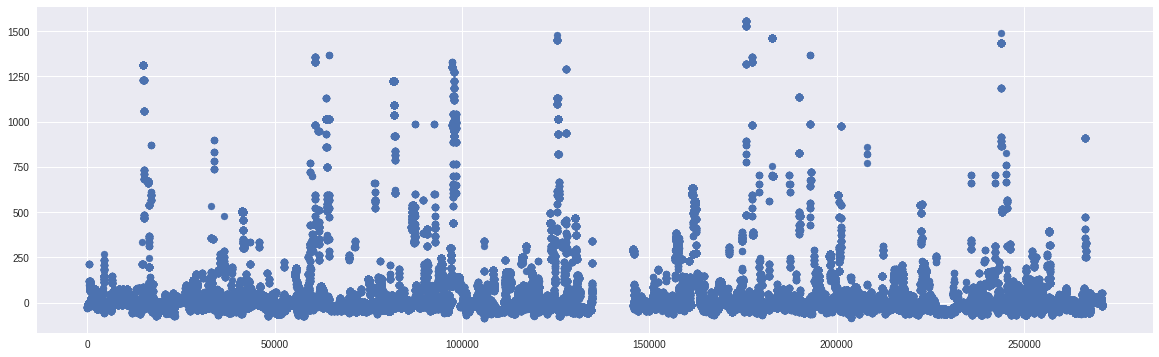

In [196]:
plt.figure(figsize=(20,6))
plt.scatter(np.arange(len(all_test_data)), error)

array([11.379007, 11.379007, 11.379007, ..., 11.607586, 11.607586,
       11.607586], dtype=float32)

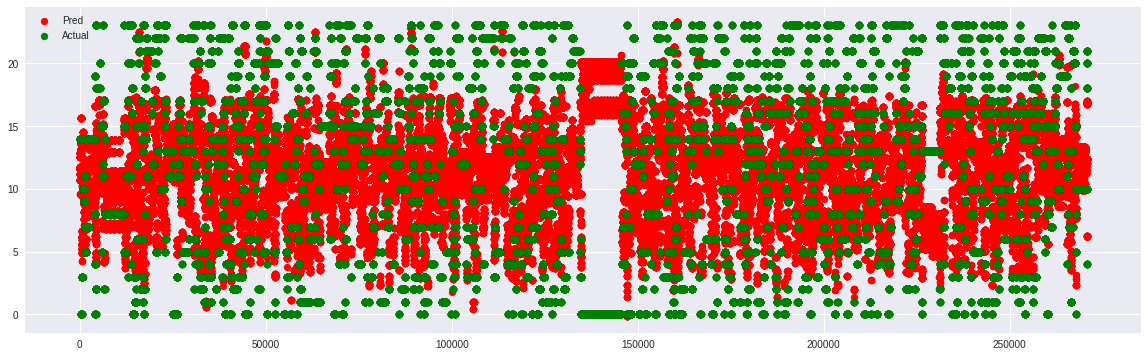

In [197]:
plt.style.use('seaborn')
plt.figure(figsize=(20,6))
plt.scatter(np.arange(len(all_test_data)),EstimatedHour, color='r', label='Pred')
plt.scatter(np.arange(len(all_test_data)),y_test, color='g', label='Actual')
plt.legend()

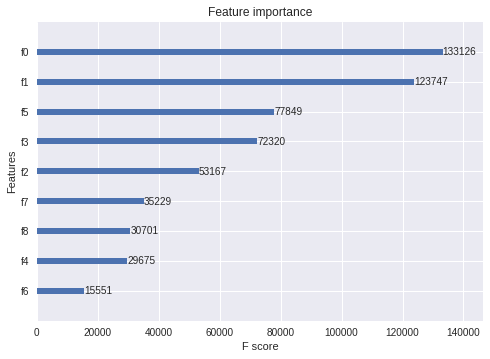

In [198]:
xgb.plot_importance(xg_reg)

## Day Prediction

In [215]:
all_train_data

,Lat,Long,Time,Length,Start,End,Start_Hour,Start_Day,End_Hour,End_Day,Start_Min,Current_Hour,Current_Min,Current_Day,End_Min
0,40.5834,-73.8548,2019-01-17 13:20:02,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,20,17,50
1,40.5799,-73.8629,2019-01-17 13:21:04,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,21,17,50
2,40.5764,-73.8713,2019-01-17 13:22:07,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,22,17,50
3,40.5745,-73.8803,2019-01-17 13:23:09,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,23,17,50
4,40.5726,-73.8892,2019-01-17 13:24:11,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,24,17,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540039,48.8037,-122.723,2019-01-03 15:28:30,54,2019-01-03 14:31:17,2019-01-03 15:32:37,14,3,15,3,31,15,28,3,32
3540040,48.8039,-122.724,2019-01-03 15:29:31,54,2019-01-03 14:31:17,2019-01-03 15:32:37,14,3,15,3,31,15,29,3,32
3540041,48.804,-122.724,2019-01-03 15:30:34,54,2019-01-03 14:31:17,2019-01-03 15:32:37,14,3,15,3,31,15,30,3,32
3540042,48.804,-122.724,2019-01-03 15:31:36,54,2019-01-03 14:31:17,2019-01-03 15:32:37,14,3,15,3,31,15,31,3,32


In [217]:
X_train2 = all_train_data[['Lat', 'Long', 'Length', 'Start_Day','Start_Hour', 'Start_Min', 'Current_Day', 'Current_Hour','Current_Min']]
y_train2 = all_train_data[['End_Day']]

In [225]:
xg_reg2 = xgb.XGBRegressor(objective ='reg:linear', 
                          booster = 'gbtree',
                          colsample_bytree = 0.85, 
                          max_depth = 50, 
                          alpha = 10, 
                          n_estimators = 40, 
                          feature_selector='greedy',
                          seed = 42, 
                          categorical=True)



In [226]:
X_test2 = all_test_data[['Lat', 'Long', 'Length', 'Start_Day','Start_Hour', 'Start_Min', 'Current_Day', 'Current_Hour','Current_Min']]
y_test2 = all_test_data[['End_Day']]

In [238]:
dtrain2 = xgb.DMatrix(X_train2.to_numpy(), y_train2.to_numpy(), feature_names = list(X_train.columns), enable_categorical=True)
params_sk = {
    'objective': 'reg:linear',
    'colsample_bytree': 0.5,
    'seed': 42}
model_final2 = xgb.train(dtrain=dtrain2, params=params_sk, verbose_eval=True)

[20:59:35] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [239]:
dX_test = xgb.DMatrix(X_test2.to_numpy(), feature_names=list(X_test2.columns), enable_categorical=True)

In [248]:
EstimatedDay = model_final2.predict(dX_test)

In [241]:
xg_reg2.fit(X_train2.to_numpy(), y_train2.to_numpy())

[20:59:51] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:59:51] WARNING: ../src/learner.cc:541: 
Parameters: { categorical, feature_selector } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', categorical=True,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.85,
             feature_selector='greedy', gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=50,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=40, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=42, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
             tree_method='exact', validate_parameters=1, ...)

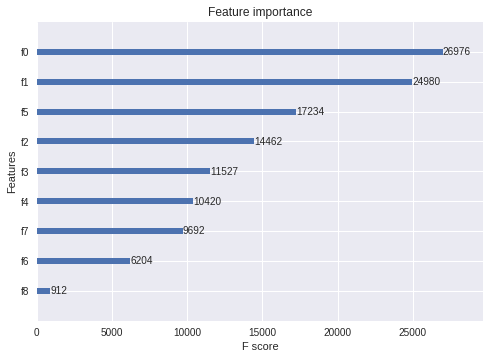

In [243]:
xgb.plot_importance(xg_reg2)

In [246]:
score = xg_reg.score(X_train.to_numpy(), y_train.to_numpy())
print("Training score: ", score)

Training score:  0.9997745344533358


In [251]:
error_day = mean_absolute_error(EstimatedDay, all_test_data['End_Day'])

In [254]:
error_day

0.8772089532126726

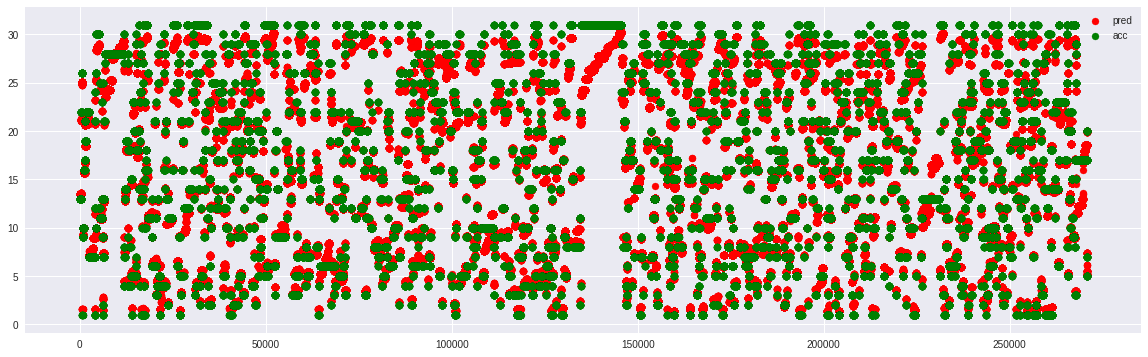

In [260]:
plt.figure(figsize=(20,6))
plt.scatter(np.arange(len(all_test_data)), EstimatedDay, color='r', label='pred')
plt.scatter(np.arange(len(all_test_data)), all_test_data['End_Day'], color='g', label='acc')
plt.legend()

# Minute Prediction

In [262]:
y_train3 = all_train_data[['End_Min']]

In [263]:
y_train3

,End_Min
0,50
1,50
2,50
3,50
4,50
...,...
3540039,32
3540040,32
3540041,32
3540042,32


In [264]:
dtrain3 = xgb.DMatrix(X_train2.to_numpy(), y_train3.to_numpy(), feature_names = list(X_train.columns), enable_categorical=True)
params_sk = {
    'objective': 'reg:linear',
    'colsample_bytree': 0.5,
    'seed': 42}
model_final3 = xgb.train(dtrain=dtrain3, params=params_sk, verbose_eval=True)

[21:09:28] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [267]:
EstimatedMin = model_final3.predict(dX_test)

In [269]:
error_min = mean_absolute_error(EstimatedMin, all_test_data['End_Min'])

In [270]:
error_min

16.540865573357888

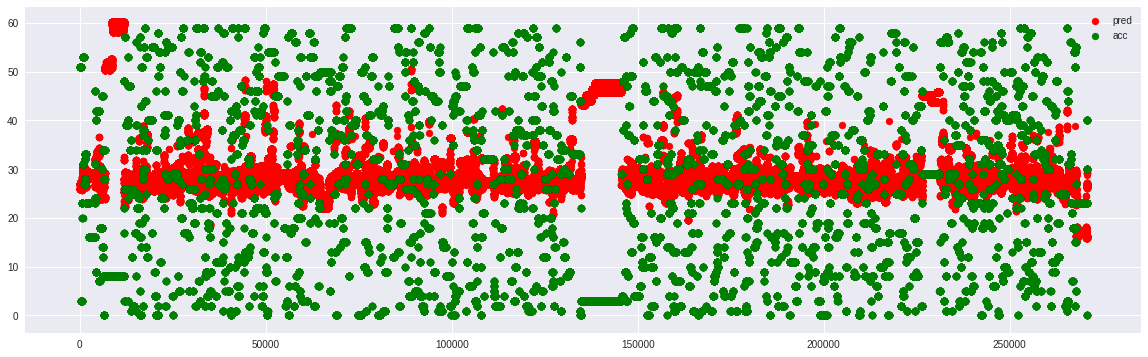

In [271]:
plt.figure(figsize=(20,6))
plt.scatter(np.arange(len(all_test_data)), EstimatedMin, color='r', label='pred')
plt.scatter(np.arange(len(all_test_data)), all_test_data['End_Min'], color='g', label='acc')
plt.legend()

In [272]:
EstimatedMin

array([25.876484, 25.876484, 25.876484, ..., 26.726633, 26.726633,
       26.726633], dtype=float32)

In [273]:
EstimatedHour

array([ 9.621667,  9.621667,  9.621667, ..., 16.860327, 16.860327,
       16.860327], dtype=float32)

In [274]:
EstimatedDay

array([13.496982 , 13.496982 , 13.496982 , ...,  7.3765364,  7.3765364,
        7.3765364], dtype=float32)

# Estimated Time of Arrival

In [293]:
def convert_to_day(estday, esthr, estmin):
    return datetime(2019, 1,estday, esthr, estmin)

estimate_arrival = pd.DataFrame({'Day': EstimatedDay.astype(int),
                                 'Hour': EstimatedHour.astype(int), 
                                 'Min': EstimatedMin.astype(int)}, index=None, dtype=int)

In [296]:
# estimate_/arrival = estimate_arrival.progress_apply(lambda x: convert_to_day(x['Day'], x['Hour'],x['Min']))

est_arrival_object = []
for i in estimate_arrival.values:
    obj = convert_to_day(i[0],i[1],i[2]-1)
    est_arrival_object.append(obj)


In [310]:
result = pd.DataFrame(est_arrival_object, columns=['ETA'])
result.to_csv("Pred_ETA.csv",index=None)

In [312]:
result


,ETA
0,2019-01-13 09:24:00
1,2019-01-13 09:24:00
2,2019-01-13 09:24:00
3,2019-01-13 09:24:00
4,2019-01-13 10:24:00
...,...
270824,2019-01-07 16:25:00
270825,2019-01-07 16:25:00
270826,2019-01-07 16:25:00
270827,2019-01-07 16:25:00


# Estimated Seconds Prediction

In [319]:
all_train_data['Start_Sec'] = all_train_data['Start'].progress_apply(lambda x: x.second)

In [320]:
all_train_data['Current_Sec'] = all_train_data['Time'].progress_apply(lambda x:x.second)
all_train_data['End_Sec'] = all_train_data['End'].progress_apply(lambda x:x.second)

In [321]:
all_test_data['Start_Sec'] = all_test_data['Start'].progress_apply(lambda x:x.second)
all_test_data['Current_Sec'] = all_test_data['Time'].progress_apply(lambda x:x.second)
all_test_data['End_Sec'] = all_test_data['End'].progress_apply(lambda x:x.second)

In [322]:
all_train_data

,Lat,Long,Time,Length,Start,End,Start_Hour,Start_Day,End_Hour,End_Day,Start_Min,Current_Hour,Current_Min,Current_Day,End_Min,Start_Sec,Current_Sec,End_Sec
0,40.5834,-73.8548,2019-01-17 13:20:02,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,20,17,50,2,2,13
1,40.5799,-73.8629,2019-01-17 13:21:04,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,21,17,50,2,4,13
2,40.5764,-73.8713,2019-01-17 13:22:07,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,22,17,50,2,7,13
3,40.5745,-73.8803,2019-01-17 13:23:09,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,23,17,50,2,9,13
4,40.5726,-73.8892,2019-01-17 13:24:11,19,2019-01-17 13:20:02,2019-01-17 13:50:13,13,17,13,17,20,13,24,17,50,2,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540039,48.8037,-122.723,2019-01-03 15:28:30,54,2019-01-03 14:31:17,2019-01-03 15:32:37,14,3,15,3,31,15,28,3,32,17,30,37
3540040,48.8039,-122.724,2019-01-03 15:29:31,54,2019-01-03 14:31:17,2019-01-03 15:32:37,14,3,15,3,31,15,29,3,32,17,31,37
3540041,48.804,-122.724,2019-01-03 15:30:34,54,2019-01-03 14:31:17,2019-01-03 15:32:37,14,3,15,3,31,15,30,3,32,17,34,37
3540042,48.804,-122.724,2019-01-03 15:31:36,54,2019-01-03 14:31:17,2019-01-03 15:32:37,14,3,15,3,31,15,31,3,32,17,36,37


In [323]:
all_test_data

,Lat,Long,Time,Length,Start,End,Start_Day,Start_Hour,Start_Min,Current_Day,Current_Hour,Current_Min,End_Day,End_Hour,End_Min,Start_Sec,Current_Sec,End_Sec
0,41.6336,-70.915,2019-01-13 02:56:14,448,2019-01-13 02:56:14,2019-01-13 14:51:23,13,2,56,13,2,56,13,14,51,14,14,23
1,41.6317,-70.9127,2019-01-13 02:57:33,448,2019-01-13 02:56:14,2019-01-13 14:51:23,13,2,56,13,2,57,13,14,51,14,33,23
2,41.6301,-70.9106,2019-01-13 02:58:43,448,2019-01-13 02:56:14,2019-01-13 14:51:23,13,2,56,13,2,58,13,14,51,14,43,23
3,41.6283,-70.9086,2019-01-13 02:59:54,448,2019-01-13 02:56:14,2019-01-13 14:51:23,13,2,56,13,2,59,13,14,51,14,54,23
4,41.628,-70.9084,2019-01-13 03:00:04,448,2019-01-13 02:56:14,2019-01-13 14:51:23,13,2,56,13,3,0,13,14,51,14,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270824,36.9333,-76.0485,2019-01-07 18:25:40,36,2019-01-07 17:45:08,2019-01-07 18:30:57,7,17,45,7,18,25,7,18,30,8,40,57
270825,36.9312,-76.0575,2019-01-07 18:26:57,36,2019-01-07 17:45:08,2019-01-07 18:30:57,7,17,45,7,18,26,7,18,30,8,57,57
270826,36.928,-76.0672,2019-01-07 18:28:21,36,2019-01-07 17:45:08,2019-01-07 18:30:57,7,17,45,7,18,28,7,18,30,8,21,57
270827,36.9252,-76.0755,2019-01-07 18:29:33,36,2019-01-07 17:45:08,2019-01-07 18:30:57,7,17,45,7,18,29,7,18,30,8,33,57


In [325]:
X_train4 = all_train_data[['Lat', 'Long', 'Length', 'Start_Day','Start_Hour', 'Start_Min', 'Current_Day', 'Current_Hour','Current_Min', 'Start_Sec', 'Current_Sec']]
y_train4 = all_train_data[['End_Sec']]

In [331]:
X_test4 = all_test_data[['Lat', 'Long', 'Length', 'Start_Day','Start_Hour', 'Start_Min', 'Current_Day', 'Current_Hour','Current_Min', 'Start_Sec', 'Current_Sec']]
y_test4 = all_test_data[['End_Sec']]

In [330]:
dtrain4 = xgb.DMatrix(X_train4.to_numpy(), y_train4.to_numpy(), feature_names = list(X_train4.columns), enable_categorical=True)
params_sk = {
    'objective': 'reg:linear',
    'colsample_bytree': 0.5,
    'seed': 42}
model_final4 = xgb.train(dtrain=dtrain4, params=params_sk, verbose_eval=True)

[21:33:21] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [337]:
dtest_sec = xgb.DMatrix(X_test4.to_numpy(), feature_names=list(X_test4.columns))

In [329]:
set(all_train_data['End_Sec'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59}

In [338]:
EstimatedSec = model_final4.predict(dtest_sec)

In [345]:
def convert_to_day(estday, esthr, estmin, estsec):
    return datetime(2019, 1,estday, esthr, estmin, estsec)

estimate_arrival = pd.DataFrame({'Day': EstimatedDay.astype(int),
                                 'Hour': EstimatedHour.astype(int), 
                                 'Min': EstimatedMin.astype(int),
                                 'Sec': EstimatedSec.astype(int)}, index=None, dtype=int)

In [343]:
estimate_arrival

,Day,Hour,Min,Sec
0,13,9,25,27
1,13,9,25,27
2,13,9,25,27
3,13,9,25,27
4,13,10,25,26
...,...,...,...,...
270824,7,16,26,29
270825,7,16,26,29
270826,7,16,26,29
270827,7,16,26,29


In [335]:
all_train_data.to_csv("XGtrain.csv", index=None)
all_test_data.to_csv("XGTest.csv", index=None)

In [346]:
# estimate_/arrival = estimate_arrival.progress_apply(lambda x: convert_to_day(x['Day'], x['Hour'],x['Min']))

est_arrival_object = []
for i in estimate_arrival.values:
    obj = convert_to_day(i[0],i[1],i[2]-1, i[3])
    est_arrival_object.append(obj)
result = pd.DataFrame(est_arrival_object, columns=['ETA'])
result.to_csv("Pred_ETA2.csv",index=None)

In [347]:
result

,ETA
0,2019-01-13 09:24:27
1,2019-01-13 09:24:27
2,2019-01-13 09:24:27
3,2019-01-13 09:24:27
4,2019-01-13 10:24:26
...,...
270824,2019-01-07 16:25:29
270825,2019-01-07 16:25:29
270826,2019-01-07 16:25:29
270827,2019-01-07 16:25:29


In [349]:
error_sec = mean_absolute_error(EstimatedSec, all_test_data['End_Sec'])

In [350]:
error_sec

15.783038257969334

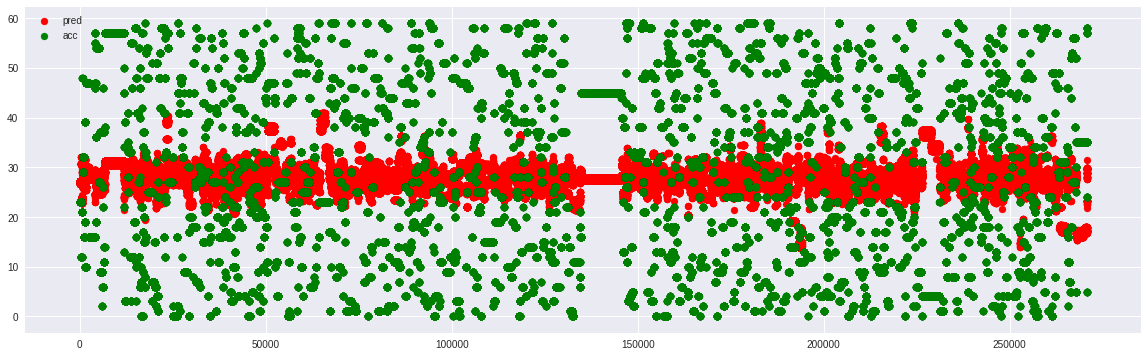

In [351]:
plt.figure(figsize=(20,6))
plt.scatter(np.arange(len(all_test_data)), EstimatedSec, color='r', label='pred')
plt.scatter(np.arange(len(all_test_data)), all_test_data['End_Sec'], color='g', label='acc')
plt.legend()